In [2]:
import cv2
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving 058.jpg to 058.jpg
Saving 057.jpg to 057.jpg
Saving 046.jpg to 046.jpg
Saving 045.jpg to 045.jpg
Saving 022.jpg to 022.jpg
Saving 021.jpg to 021.jpg
Saving 010.jpg to 010.jpg
Saving 009.jpg to 009.jpg
Saving 005.jpg to 005.jpg
Saving 004.jpg to 004.jpg


In [23]:
# ------------------------- #
#        Image Prep         #
# ------------------------- #

def load_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)         # Load as grayscale
    img = cv2.resize(img, (256,256))                           # Resize
    img = img.astype(np.float32) / 255.0                       # Normalize [0,1]
    return img

def prepare_tensor(img):
    img_np = np.expand_dims(img, axis=(0,1))                   # Add batch and channel dimensions
    return torch.from_numpy(img_np)



In [11]:
# ------------------------- #
#         Kernels           #
# ------------------------- #

def create_kernels():
    # Horizontal Kernal detects the Vertical Edges
    Kh = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]], dtype=np.float32)

    # Vertical Kernal detects the Horizontal Edges
    Kv = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]], dtype=np.float32)

    kernels = np.stack([Kh, Kv])
    kernels = np.expand_dims(kernels, axis=1)

    return torch.from_numpy(kernels)


In [16]:
# ------------------------- #
#     CNN Convolution       #
# ------------------------- #

def apply_convolution(img_tensor, kernel_tensor):

    conv = nn.Conv2d(1, 2, kernel_size=3, bias=False)
    conv.weight = nn.Parameter(kernel_tensor, requires_grad=False)

    with torch.no_grad():
        output = conv(img_tensor)

    vertical_edges   = output[0,1].numpy()
    horizontal_edges = output[0,0].numpy()

    return vertical_edges, horizontal_edges


In [17]:
# ------------------------- #
#       Visualization       #
# ------------------------- #

def visualize(img, vertical_edges, horizontal_edges):

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(img, cmap="gray")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.title("Vertical Edges (Kh)")
    plt.imshow(vertical_edges, cmap="gray")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.title("Horizontal Edges (Kv)")
    plt.imshow(horizontal_edges, cmap="gray")
    plt.axis("off")

    plt.show()

In [18]:
# ------------------------- #
#      Edge Detector        #
# ------------------------- #

def Detect_Edge(image_path):
    img = load_image(image_path)
    img_tensor = prepare_tensor(img)
    kernel_tensor = create_kernels()
    vertical_edges, horizontal_edges = apply_convolution(img_tensor, kernel_tensor)
    visualize(img, vertical_edges, horizontal_edges)


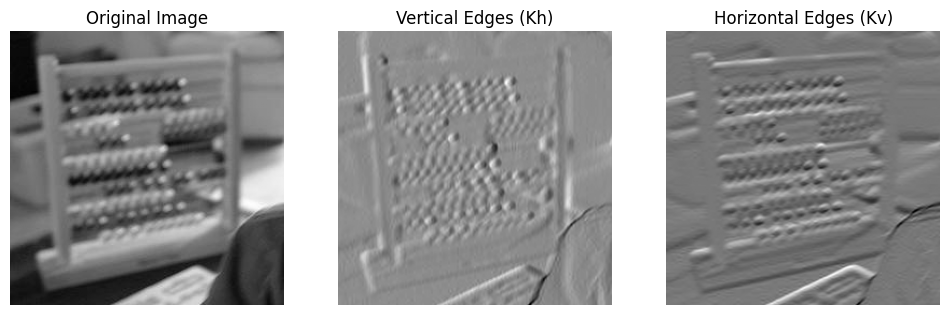

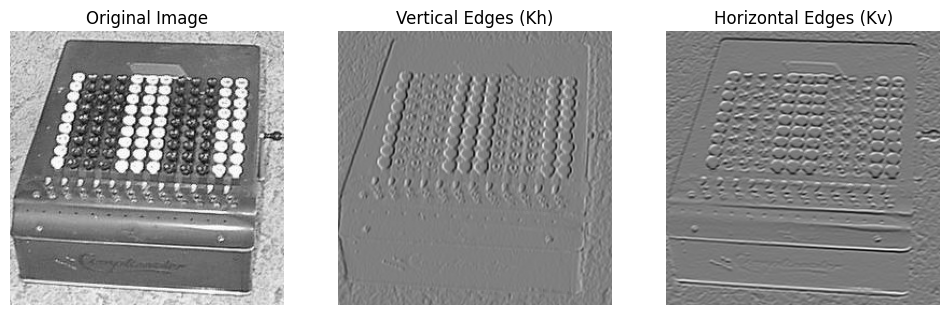

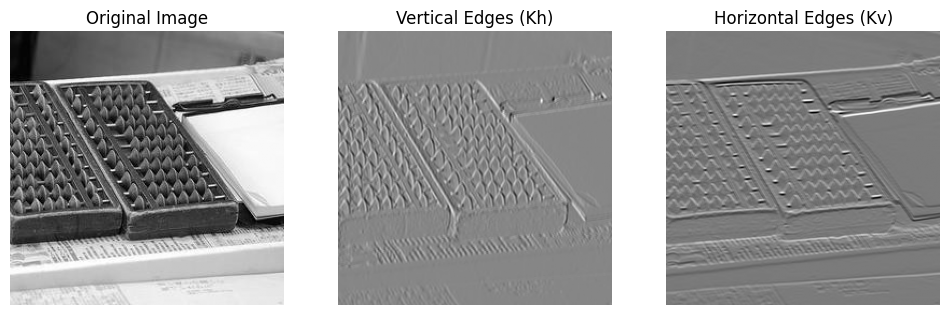

In [20]:
Detect_Edge("004.jpg")
Detect_Edge("005.jpg")
Detect_Edge("009.jpg")

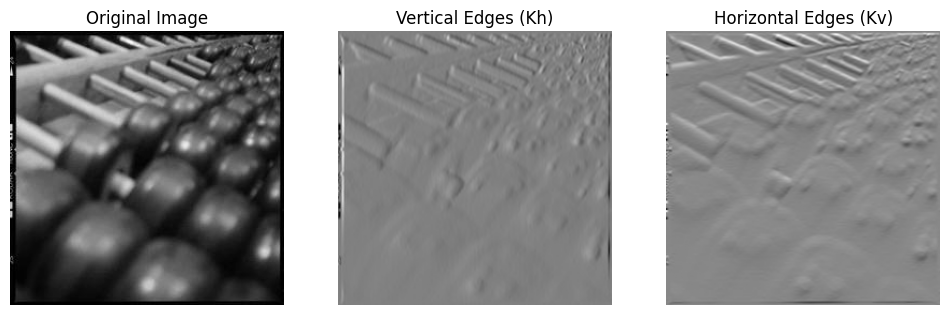

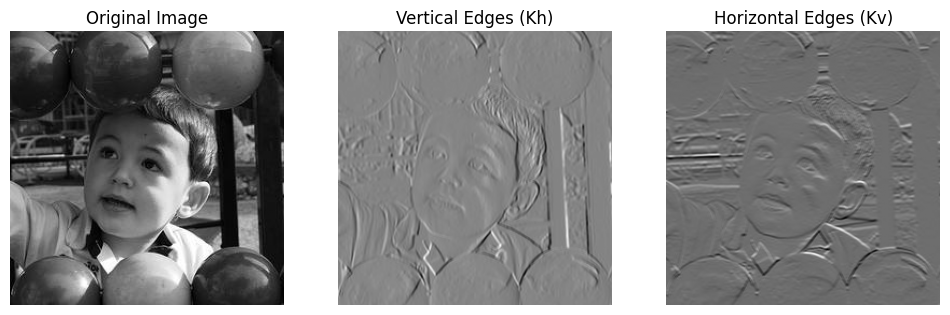

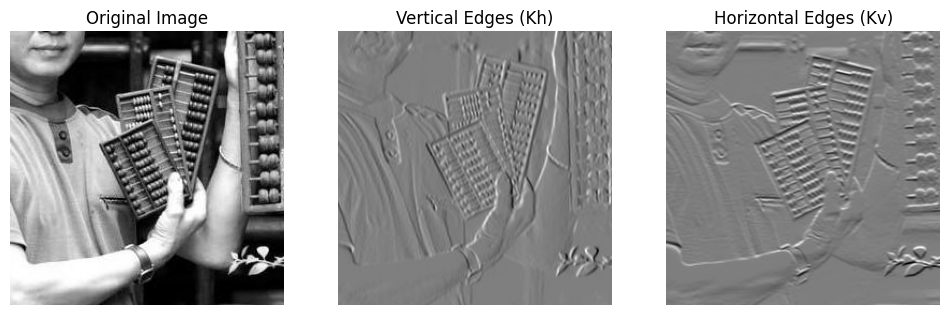

In [21]:
Detect_Edge("010.jpg")
Detect_Edge("021.jpg")
Detect_Edge("022.jpg")

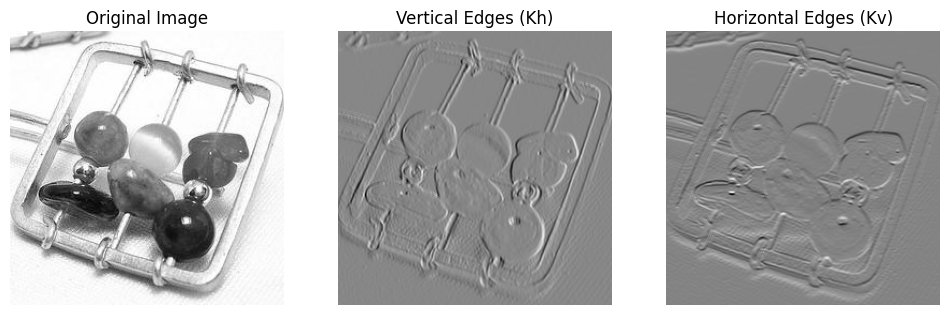

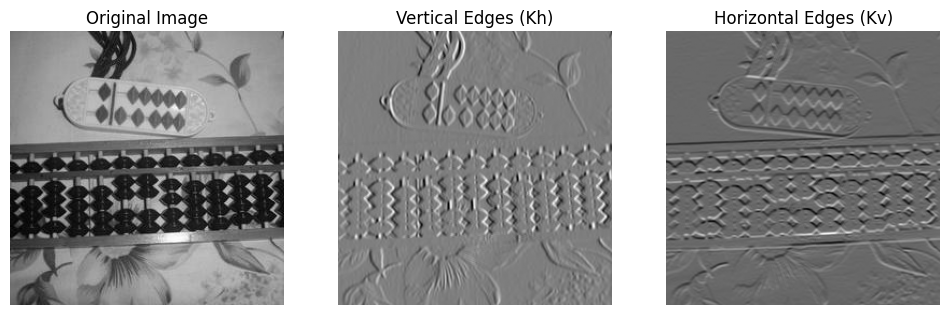

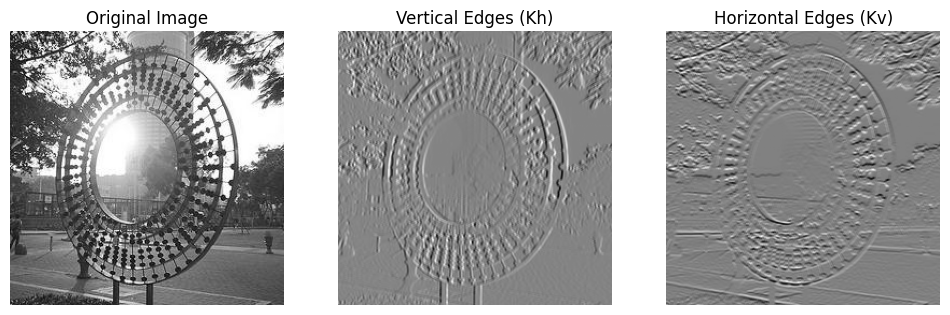

In [22]:
Detect_Edge("045.jpg")
Detect_Edge("046.jpg")
Detect_Edge("057.jpg")